In [55]:
import cv2
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np


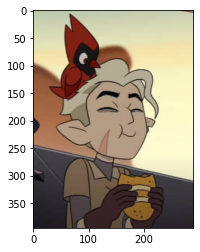

In [56]:
img = cv2.cvtColor(cv2.imread('image_1.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img)

## **Function 1**: color balance, to perform this function, the user needs to enter the necessary parameters to perform color balance. (can use the slider to represent it visually)

In [57]:
@interact(r=(0,255), g=(0,255),b=(0,255))
def ab(r=0,g=0,b=0):
    rr,gg,bb = cv2.split(img)
    rr += r
    gg += g
    bb += b
    plt.imshow(cv2.merge((rr,gg,bb)))

interactive(children=(IntSlider(value=0, description='r', max=255), IntSlider(value=0, description='g', max=25…

## Function 2: Show histogram and enter the necessary information to perform histogram equalization

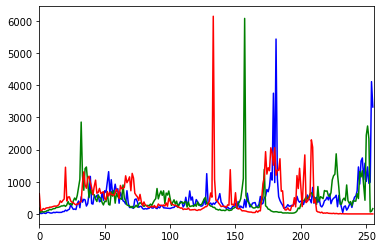

In [58]:
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    histr = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(histr, color = col)
    plt.xlim([0,256])
plt.show()

In [59]:
tfa = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [60]:
def my_float2int(img):
    img = np.round(img, 0)
    img = np.minimum(img, 255)
    img = np.maximum(img, 0)
    img = img.astype('uint8')
    
    return img

def equalizeHistogram(img):
    
    img_height = img.shape[0]
    img_width = img.shape[1]
    histogram = np.zeros([256], np.int32) 
    
    for i in range(0, img_height):
        for j in range(0, img_width):
            histogram[img[i, j]] +=1
    pdf_img = histogram / histogram.sum()
    
    cdf = np.zeros([256], float)

    for i in range(0, 256):
        for j in range(0, i+1):
            cdf[i] += pdf_img[j]

    cdf = np.zeros(256, float)
    cdf[0] = pdf_img[0]
    for i in range(1, 256):
        cdf[i] = cdf[i-1] + pdf_img[i]
     
    cdf_eq = np.round(cdf * 255, 0)
    
    imgEqualized = np.zeros((img_height, img_width))
    
    for i in range(0, img_height):
        for j in range(0, img_width):
            r = img[i, j] 
            s = cdf_eq[r] 
            imgEqualized[i, j] = s 
            
    return imgEqualized

In [61]:
equalImg = equalizeHistogram(tfa)

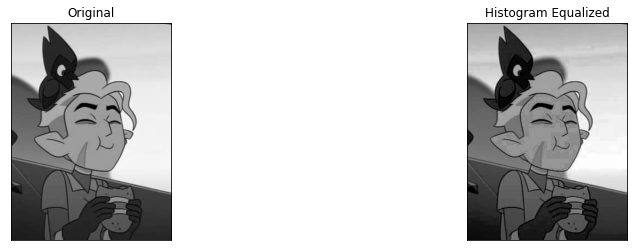

In [62]:
plt.figure().set_figwidth(15)
plt.subplot(121),plt.imshow(tfa,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(equalImg,cmap='gray'),plt.title('Histogram Equalized')
plt.xticks([]), plt.yticks([])
# plt.subplot(222),plt.imshow(equ,cmap='gray'),plt.title('Histogram Equaliddzed')
# plt.xticks([]), plt.yticks([])
plt.show()
# plt.imshow(equalImg, cmap="gray")

## Function 3: Median filter to remove noise (salt and pepper noise)

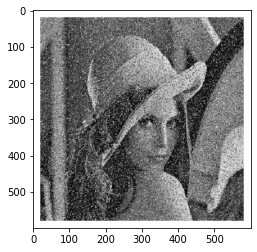

In [63]:
img_with_noise = cv2.imread("./salt_pepper.jpg")
if img_with_noise is None:
    print("Error: Could not read image")
plt.imshow(img_with_noise)

In [64]:
def median_filter(img, kernel_size = 7):
    padded_img = np.pad(img, [(kernel_size-1)//2, (kernel_size-1)//2], mode='edge')

    filtered_img = np.zeros_like(img)

    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            window = padded_img[row:row + kernel_size, col:col + kernel_size]

            filtered_img[row, col] = np.median(window)
    return filtered_img


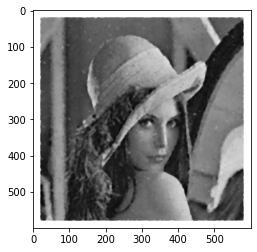

In [65]:
filtered_img2 = cv2.medianBlur(img_with_noise, 7)
plt.imshow(filtered_img2)

In [66]:
@interact(k=(1,30))
def ab(k=1): # đợi hơi lâu nha thầy, tầm 10-15s là ra kết quả
    filtered_img = median_filter(img_with_noise, kernel_size=k)
    plt.imshow(filtered_img)

interactive(children=(IntSlider(value=1, description='k', max=30, min=1), Output()), _dom_classes=('widget-int…

**Function 4:** implement the Mean filter to remove noise in image (salt and pepper noise)**

In [67]:
def mean_filter(img, filter_size = 5):
    from itertools import product
    
    n_height = img.shape[0] - filter_size + 1
    n_width = img.shape[1] - filter_size + 1
    
    window = np.empty((n_height*n_width, filter_size**2, 3))
    row = 0
    
    for i,j in product(range(n_height), range(n_width)):
        window[row,:,:] = np.ravel(img[i:i+filter_size, j:j+filter_size]).reshape(-1,3)
        row+=1
    filtered_image_mean = np.empty((n_height*n_width,3))

    for r in range(n_height*n_width):
        filtered_image_mean[r,:] = window[r,:,:].mean(axis=0)
    
    filtered_image_mean = filtered_image_mean.reshape(n_height, n_width, 3).astype(np.uint8)

    return filtered_image_mean    


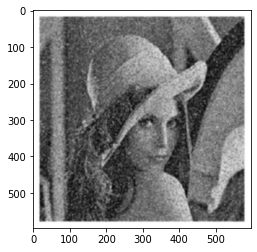

In [68]:
filtered_image_mean = mean_filter(img_with_noise)
plt.imshow(filtered_image_mean)

In [69]:
@interact(k=(1,30))
def ab(k=1): # đợi hơi lâu nha thầy, tầm 10-15s là ra kết quả
    filtered_img = mean_filter(img_with_noise, k)
    plt.imshow(filtered_img)

interactive(children=(IntSlider(value=1, description='k', max=30, min=1), Output()), _dom_classes=('widget-int…

**Function 5:** implement Gaussian smoothing to perform image smoothing.

In [70]:
def gaussian_formula(x,y,sigma):
    from sklearn.preprocessing import normalize
    result = (1/(2*np.pi*(sigma**2)))*np.exp(-(x**2+y**2)/(2*(sigma**2)))
    return result/result.sum()

In [71]:
# def gaussian_filter(image, filter_size=7, sigma=1):

#     from itertools import product
#     img = image[:,:,2]
#     center = filter_size//2
#     x,y = np.mgrid[0-center:filter_size-center, 0-center:filter_size-center]
#     filter_ = gaussian_formula(x,y,sigma)

#     new_img_height = image.shape[0] - filter_size + 1
#     new_img_width = image.shape[1] - filter_size + 1

#     new_image = np.empty((new_img_height*new_img_width, filter_size**2))

#     row = 0
#     for i,j in product(range(new_img_height), range(new_img_width)):
#         new_image[row,:] = np.ravel(img[i:i+filter_size, j:j+filter_size])
#         row += 1

#     filter_ = np.ravel(filter_)
#     filtered_image = np.dot(new_image, filter_).reshape(new_img_height, new_img_width).astype(np.uint8)
#     image[center:new_img_height+center,center:new_img_width+center,2] = filtered_image


#     return image

from itertools import product

from cv2 import COLOR_BGR2GRAY, cvtColor, imread, imshow, waitKey
from numpy import dot, exp, mgrid, pi, ravel, square, uint8, zeros


def gen_gaussian_kernel(k_size, sigma):
    center = k_size // 2
    x, y = mgrid[0 - center : k_size - center, 0 - center : k_size - center]
    g = 1 / (2 * pi * sigma) * exp(-(square(x) + square(y)) / (2 * square(sigma)))
    return g


def gaussian_filter(image, k_size, sigma):
    height, width = image.shape[0], image.shape[1]
    # dst image height and width
    dst_height = height - k_size + 1
    dst_width = width - k_size + 1

    # im2col, turn the k_size*k_size pixels into a row and np.vstack all rows
    image_array = zeros((dst_height * dst_width, k_size * k_size))
    row = 0
    for i, j in product(range(dst_height), range(dst_width)):
        window = ravel(image[i : i + k_size, j : j + k_size])
        image_array[row, :] = window
        row += 1

    #  turn the kernel into shape(k*k, 1)
    gaussian_kernel = gen_gaussian_kernel(k_size, sigma)
    filter_array = ravel(gaussian_kernel)

    # reshape and get the dst image
    dst = dot(image_array, filter_array).reshape(dst_height, dst_width).astype(uint8)

    return dst


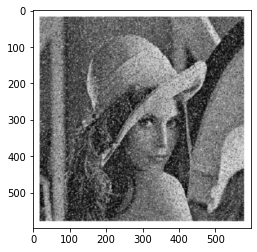

In [72]:
img_with_noise_1 = cvtColor(img_with_noise, COLOR_BGR2GRAY)
filtered_img_gaussian = gaussian_filter(img_with_noise_1,4,1)
plt.imshow(filtered_img_gaussian, cmap='gray')

In [73]:
@interact(k=(1,30,2))
def ab(k=1): # đợi hơi lâu nha thầy, tầm 10-15s là ra kết quả
    filtered_img_gaussian = gaussian_filter(img_with_noise_1,k,1)
    plt.imshow(filtered_img_gaussian, cmap='gray')

interactive(children=(IntSlider(value=1, description='k', max=30, min=1, step=2), Output()), _dom_classes=('wi…